# 基尼系数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

axis = [
    X[:, 0].min()*1.1 - X[:, 0].max()*0.1,
    X[:, 0].max()*1.1 - X[:, 0].min()*0.1,
    X[:, 1].min()*1.1 - X[:, 1].max()*0.1,
    X[:, 1].max()*1.1 - X[:, 1].min()*0.1
]

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [4]:
def plot_decision_boundary(algo, axis):
    
    x0 = np.linspace(axis[0], axis[1], int(100 * (axis[1]-axis[0])))
    x1 = np.linspace(axis[2], axis[3], int(100 * (axis[3]-axis[2])))
    x0, x1 = np.meshgrid(x0, x1)
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = algo.predict(X_new)
    z = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_map = ListedColormap(["#f9a19a", "#90caf9", "#ffcb7f"])
    
    plt.contourf(x0, x1, z, linewidth=5, cmap=custom_map)

/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


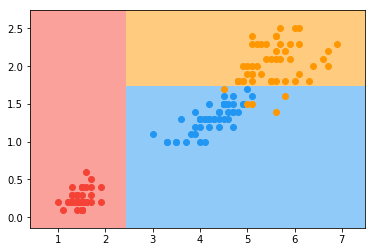

In [5]:
plot_decision_boundary(dt_clf, axis)
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#2196f3")
plt.scatter(X[y==2, 0], X[y==2, 1], color="#ff9800")
plt.show()

#### 模拟使用基尼系数划分

In [6]:
from collections import Counter
def split(X, y, d, v):
    index_l = X[:, d] <= v
    index_r = X[:, d] > v
    return X[index_l], X[index_r], y[index_l], y[index_r]
def gini(y):
    counter = Counter(y)
    res = 1.0
    for count in counter.values():
        p = count / len(y)
        res -= p ** 2
    return res

In [7]:
def try_split(X, y):
    best_gini, best_d, best_p = float("inf"), -1, -1
    for d in range(X.shape[1]):
        indexes = np.argsort(X[:, d])
        for k in range(1, X.shape[0]):
            if X[indexes[k-1], d] < X[indexes[k], d]:
                v = (X[indexes[k-1], d] + X[indexes[k], d]) / 2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                e = p_l * gini(y_l) + p_r * gini(y_r)
                if e < best_gini:
                    best_gini, best_d, best_v = e, d, v
    return best_gini, best_d, best_v

In [8]:
best_gini, best_d, best_v = try_split(X, y)
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)
print(best_gini, best_d, best_v)
print(gini(y1_l), gini(y1_r))

0.3333333333333333 0 2.45
0.0 0.5


In [9]:
best_gini, best_d, best_v = try_split(X1_r, y1_r)
X2_l, X2_r, y2_l, y2_r = split(X, y, best_d, best_v)
print(best_gini, best_d, best_v)
print(gini(y2_l), gini(y2_r))

0.1103059581320451 1 1.75
0.5445636094674556 0.04253308128544431
